# Data Integration

Date: 26/10/2018

Version: 1.0

Environment: Python 3.6.4 and Jupyter notebook: 5.7.0

Libraries used: 
* pandas (for dataframes, reading csv and eda, included in Anaconda Python 3.6) 
* matplotlib (for creating charts, included in Anaconda Python 3.6) 
* math (to perform mathematical functions, included in Anaconda Python 3.6)
* datetime (for manipulating dates and times, included in Anaconda Python 3.6)
* numpy (for multidimension array and metrics and mathematical functions, included in Anaconda Python 3.6)
* beautifulSoup (for reading xml file, included in Anaconda Python 3.6)
* json (for reading and writing json files, included in Anaconda Python 3.6)
* xml.etree.ElementTree (for reading and manipulating xml file, included in Anaconda Python 3.6)
* shapefile (for reading and manipulating shape data, included in Anaconda Python 3.6)
* shapely.geometry (for getting point,boundary data, included in Anaconda Python 3.6)

## Introduction

Assignment comprises of Data Integration. We are provided with 7 datasets (xml, json, csv, xlxs etc) consisting of housing data in victoria. we need to integrate them together to fetch information of these properties different features.

The required tasks are the following:

1. Extract the details from hospitals.html file consisting of hospital data.
2. Extract the details from shopingcenters.json file consisting of shopping center data.
3. Extract the details from real_state.json file consisting of property data.
4. Extract the details from real_state.xml file consisting of property data.
5. Extract the details from supermarkets.xlxs file consisting of supermarket data.
6. Extract the details from GTFS_Melbourne_Train_Information consisting of melborne train data.
7. Extract the details from vic_suburb_boundary consisting of suburb data.
8. Integrating data to find nearest hospital, shopping center, supermarket, train station and direct route to flinder street from each property and property details.
9. Fixing data if any (null or duplicate data).
10. Storing the final data of each property into 29480396_ass3.csv.

## Import Libraries

In [1]:
from bs4 import BeautifulSoup # reading xml file
import pandas as pd  # creating dataframes, reading and writing scv files
import json  # for reading json files
import xml.etree.ElementTree as ET  # for reading xml file
from math import sin, cos, sqrt, atan2, radians  # for maths functions and operations
import numpy as np # for multi dimension array and matrics and mathematical calculations
import matplotlib  # for ploting different types of graphs 
%matplotlib inline
import shapefile  # for encoding points and shapes
from shapely.geometry import shape  # for getting shapes from our shape data
from shapely.geometry import Point  # getting points from out location
from datetime import datetime # for datetime manipulations

# Loading Hospital Data

In [2]:
# Loading hospitals data from hospitals.html file

hospital_open = open('hospitals.html','r')
soup = BeautifulSoup(hospital_open, "lxml") # loading xml data format 

In [3]:
#extracting information within table tags

right_table = soup.find('table', class_= 'dataframe')
right_table

<table border="1" class="dataframe">
<thead>
<tr style="text-align: right;">
<th></th>
<th>id</th>
<th>lat</th>
<th>lng</th>
<th>name</th>
</tr>
</thead>
<tbody>
<tr>
<th>0</th>
<td>hospital_001</td>
<td>-37.990622</td>
<td>145.072836</td>
<td>Como Private Hospital</td>
</tr>
<tr>
<th>1</th>
<td>hospital_002</td>
<td>-37.855469</td>
<td>145.268183</td>
<td>Mountain District Private Hospital</td>
</tr>
<tr>
<th>2</th>
<td>hospital_003</td>
<td>-37.792230</td>
<td>144.889128</td>
<td>Western Hospital</td>
</tr>
<tr>
<th>3</th>
<td>hospital_004</td>
<td>-37.756042</td>
<td>145.061896</td>
<td>Mercy Hospital for Women</td>
</tr>
<tr>
<th>4</th>
<td>hospital_005</td>
<td>-37.760623</td>
<td>144.815624</td>
<td>Sunshine Hospital</td>
</tr>
<tr>
<th>5</th>
<td>hospital_006</td>
<td>-36.359274</td>
<td>145.410832</td>
<td>Shepparton Private Hospital</td>
</tr>
<tr>
<th>6</th>
<td>hospital_007</td>
<td>-37.774573</td>
<td>144.923973</td>
<td>Ascot Vale Road Specialist Rooms</td>
</tr>
<tr>
<th>

In [4]:
# generate list # Ref-1

A=[]
B=[]
C=[]
D=[]
for row in right_table.findAll("tr"):  # extracting heading
    cells = row.findAll('td')  # extracting values
    if len(cells)==4:  # extracting table data and headings
        A.append(cells[0].find(text=True)) # appending hospital_id column values in list A
        B.append(cells[1].find(text=True)) # appending lat column values in list B
        C.append(cells[2].find(text=True)) # appending lng column values in list C
        D.append(cells[3].find(text=True)) # appending hospital_name column values in list D
        
#import pandas to convert list to dataframe

df_hospital=pd.DataFrame(A,columns=['hospital_id'])
df_hospital['lat']=B
df_hospital['lng']=C
df_hospital['hospital_name']=D
df_hospital # dataframe for hospital data


,hospital_id,lat,lng,hospital_name
0,hospital_001,-37.990622,145.072836,Como Private Hospital
1,hospital_002,-37.855469,145.268183,Mountain District Private Hospital
2,hospital_003,-37.792230,144.889128,Western Hospital
3,hospital_004,-37.756042,145.061896,Mercy Hospital for Women
4,hospital_005,-37.760623,144.815624,Sunshine Hospital
5,hospital_006,-36.359274,145.410832,Shepparton Private Hospital
6,hospital_007,-37.774573,144.923973,Ascot Vale Road Specialist Rooms
7,hospital_008,-37.849467,145.226801,Knox Private Hospital
8,hospital_009,-37.869801,145.003096,Masada Private Hospital
9,hospital_010,-37.810454,145.194100,Mitcham Private Hospital


Checking for any duplicate rows in hospital dataframe

In [5]:
df_hospital[df_hospital.duplicated()]

,hospital_id,lat,lng,hospital_name


Checking for data types in hospital dataframe

In [6]:
df_hospital.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 199 entries, 0 to 198
Data columns (total 4 columns):
hospital_id      199 non-null object
lat              199 non-null object
lng              199 non-null object
hospital_name    199 non-null object
dtypes: object(4)
memory usage: 6.3+ KB


Converting latitudes and longitudes in float type for distance calculations

In [7]:
df_hospital['lat'] = df_hospital.lat.astype(float)
df_hospital['lng'] = df_hospital.lng.astype(float)

In [8]:
df_hospital.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 199 entries, 0 to 198
Data columns (total 4 columns):
hospital_id      199 non-null object
lat              199 non-null float64
lng              199 non-null float64
hospital_name    199 non-null object
dtypes: float64(2), object(2)
memory usage: 6.3+ KB


lat and long converted to float type

In [9]:
# checking for null values in hospital data

df_hospital[df_hospital['hospital_id'].isnull()]

,hospital_id,lat,lng,hospital_name


Above output shows there is no null values in hospital data

## Loading Shopping Center data

In [10]:
# Loading shopping center data from shopingcenters.json file

shopcenter_file = open('shopingcenters.json', 'r')
data = json.load(shopcenter_file) # for loading json data 
df_shopcenter = pd.DataFrame(data) # creating dataframe for shopingcenter data
df_shopcenter 

,lat,lng,sc_id
0,-37.767915,145.041790,SC_001
1,-37.819375,145.171472,SC_002
2,-37.971131,145.089065,SC_003
3,-35.280406,149.132550,SC_004
4,-37.574572,144.920452,SC_005
5,-38.355943,144.907320,SC_006
6,-37.812680,144.962905,SC_007
7,-37.811846,144.969834,SC_008
8,-37.765650,145.091914,SC_009
9,-37.714111,144.886988,SC_010


In [11]:
# checking for any duplicate in data shoping center data 
df_shopcenter[df_shopcenter.duplicated()]

,lat,lng,sc_id


Above output shows that there is no duplicate data in shoping center data

## Loading Property Data of json File

In [12]:
# Loading data from real_state json file

realstate_file = open('real_state.json', 'r')
data = json.load(realstate_file)
df_realstate_json = pd.DataFrame(data) # creating dataframe for property data
df_realstate_json

,addr_street,bathrooms,bedrooms,lat,lng,parking_space,price,property_id,property_type,year
0,58 Cuthbert Street,1.0,3.0,-37.684444,144.930405,0.0,2984000.0,19029.0,house,2009.0
1,3 Young Street,2.0,4.0,-37.747993,145.010973,3.0,12450000.0,32557.0,house,2013.0
2,172 Graham Street,1.0,3.0,-37.690346,144.917394,0.0,3000000.0,18321.0,house,2016.0
3,3 Piper Crescent,2.0,3.0,-37.698704,145.168106,2.0,8592000.0,47010.0,house,2009.0
4,4 Moore Street,1.0,2.0,-37.825928,145.010773,1.0,3310000.0,53225.0,house,2008.0
5,23 Alden Court,2.0,4.0,-37.972361,145.075766,2.0,11815000.0,90330.0,house,2014.0
6,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN
7,28 Charles Street,1.0,3.0,-37.772883,144.963995,1.0,10980000.0,20930.0,house,2016.0
8,8 Buchanan Street,2.0,3.0,-37.773123,145.038760,2.0,30560000.0,39028.0,house,2013.0
9,138 Hyde Street,1.0,3.0,-37.815086,144.896820,0.0,5220000.0,2825.0,house,2008.0


Checking data type for json property data

In [13]:
df_realstate_json.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1010 entries, 0 to 1009
Data columns (total 10 columns):
addr_street      1003 non-null object
bathrooms        1003 non-null float64
bedrooms         1003 non-null float64
lat              1003 non-null float64
lng              1003 non-null float64
parking_space    1003 non-null float64
price            1003 non-null float64
property_id      1003 non-null float64
property_type    1003 non-null object
year             1003 non-null float64
dtypes: float64(8), object(2)
memory usage: 79.0+ KB


In [14]:
# checking for duplicate data in realstate json data
df_realstate_json[df_realstate_json.duplicated()]

,addr_street,bathrooms,bedrooms,lat,lng,parking_space,price,property_id,property_type,year
69,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN
315,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN
434,6 Pilbara Mews,2.0,4.0,-37.760191,145.090299,2.0,8001000.0,50334.0,house,2011.0
545,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN
546,152 Ormond Road,1.0,3.0,-37.886774,144.989400,2.0,18700000.0,84679.0,house,2016.0
658,34 Sullivan Street,1.0,3.0,-37.937740,145.151993,1.0,6069000.0,78995.0,house,2009.0
731,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN
745,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN
831,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN
971,19 Silvana Way,1.0,3.0,-37.705261,144.752254,1.0,3520000.0,12520.0,house,2011.0


Above output shows there are duplicate as well as null data in property json data

In [15]:
# dropping duplicate values
df_realstate_json = df_realstate_json.drop_duplicates()

In [16]:
# validating if still any duplicates there or not
df_realstate_json[df_realstate_json.duplicated()]

,addr_street,bathrooms,bedrooms,lat,lng,parking_space,price,property_id,property_type,year


In [17]:
# checking for any null rows in property dataframe
df_realstate_json[df_realstate_json['property_id'].isnull()]

,addr_street,bathrooms,bedrooms,lat,lng,parking_space,price,property_id,property_type,year
6,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN


In [18]:
# removing null from realstate json file
df_realstate_json = df_realstate_json.dropna(how = 'all')

In [19]:
# validating for null values
df_realstate_json[df_realstate_json['property_id'].isnull()]

,addr_street,bathrooms,bedrooms,lat,lng,parking_space,price,property_id,property_type,year


## Loading Property Data of xml file

In [20]:
# Loading data from real_state.xml file

tree = ET.parse('real_state.xml')
root = tree.getroot()

dict_xml = {}

for element in root:
    features = str(element).split("'") 
    dict_xml[features[1]] = []  # extracting features from xml tags

    for subelement in element:
        dict_xml[features[1]].append(subelement.text) # to extract subelements from xml tags

df_realstate_xml = pd.DataFrame(dict_xml) # creating dataframe for xml property data
df_realstate_xml

,addr_street,bathrooms,bedrooms,lat,lng,parking_space,price,property_id,property_type,year
0,65 Cameron Parade,1.0,4.0,-37.698136,145.069221,0.0,5736000.0,41018.0,house,2011.0
1,1 Balmoral Avenue,2.0,4.0,-37.73703,144.910424,3.0,14400000.0,14918.0,house,2012.0
2,29a Abinger Street,2.0,3.0,-37.820146,145.001341,1.0,10710000.0,52926.0,house,2016.0
3,27 Grant Street,1.0,2.0,-37.756946,144.973038,0.0,6744000.0,20911.0,house,2012.0
4,59A Maple Street,2.0,4.0,-37.816247,145.159189,1.0,5850000.0,58226.0,house,2015.0
5,20 Grampian Street,1.0,2.0,-37.734054,144.987179,1.0,11680000.0,32233.0,house,2014.0
6,24 Lambeth Street,1.0,3.0,-37.789509,144.934197,0.0,7014000.0,10294.0,house,2013.0
7,16 Eothen Lane,2.0,4.0,-37.80301285,145.3191071,3.0,7140000.0,65154.0,house,2008.0
8,33 Green Gully Road,2.0,3.0,-37.722374,144.826662,0.0,5390000.0,11821.0,house,2012.0
9,57 Yarra Avenue,1.0,3.0,-37.719315,145.018047,1.0,8775000.0,35239.0,house,2016.0


In [21]:
# Checking for duplicate values realstate xml data 
df_realstate_xml[df_realstate_xml.duplicated()]

,addr_street,bathrooms,bedrooms,lat,lng,parking_space,price,property_id,property_type,year
345,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
357,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
638,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
665,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
835,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
839,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
845,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan


In [22]:
# checking for null data in realstate xml data
df_realstate_xml[df_realstate_xml['property_id']=='nan']

,addr_street,bathrooms,bedrooms,lat,lng,parking_space,price,property_id,property_type,year
36,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
345,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
357,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
638,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
665,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
835,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
839,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
845,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan


In [23]:
# removing nan from real state xml file
df_realstate_xml= df_realstate_xml.drop(df_realstate_xml[df_realstate_xml['property_id']=='nan'].index.get_values())
df_realstate_xml

,addr_street,bathrooms,bedrooms,lat,lng,parking_space,price,property_id,property_type,year
0,65 Cameron Parade,1.0,4.0,-37.698136,145.069221,0.0,5736000.0,41018.0,house,2011.0
1,1 Balmoral Avenue,2.0,4.0,-37.73703,144.910424,3.0,14400000.0,14918.0,house,2012.0
2,29a Abinger Street,2.0,3.0,-37.820146,145.001341,1.0,10710000.0,52926.0,house,2016.0
3,27 Grant Street,1.0,2.0,-37.756946,144.973038,0.0,6744000.0,20911.0,house,2012.0
4,59A Maple Street,2.0,4.0,-37.816247,145.159189,1.0,5850000.0,58226.0,house,2015.0
5,20 Grampian Street,1.0,2.0,-37.734054,144.987179,1.0,11680000.0,32233.0,house,2014.0
6,24 Lambeth Street,1.0,3.0,-37.789509,144.934197,0.0,7014000.0,10294.0,house,2013.0
7,16 Eothen Lane,2.0,4.0,-37.80301285,145.3191071,3.0,7140000.0,65154.0,house,2008.0
8,33 Green Gully Road,2.0,3.0,-37.722374,144.826662,0.0,5390000.0,11821.0,house,2012.0
9,57 Yarra Avenue,1.0,3.0,-37.719315,145.018047,1.0,8775000.0,35239.0,house,2016.0


In [24]:
# validating for any null values in realstate xml data
df_realstate_xml[df_realstate_xml['property_id']=='nan']

,addr_street,bathrooms,bedrooms,lat,lng,parking_space,price,property_id,property_type,year


In [25]:
# converting object to float type Ref-2
df_realstate_xml['bathrooms'] = df_realstate_xml.bathrooms.astype(float)
df_realstate_xml['bedrooms'] = df_realstate_xml.bedrooms.astype(float)
df_realstate_xml['lat'] = df_realstate_xml.lat.astype(float)
df_realstate_xml['lng'] = df_realstate_xml.lng.astype(float)
df_realstate_xml['parking_space'] = df_realstate_xml.parking_space.astype(float)
df_realstate_xml['price'] = df_realstate_xml.price.astype(float)
df_realstate_xml['property_id'] = df_realstate_xml.property_id.astype(float)
df_realstate_xml['year'] = df_realstate_xml.year.astype(float)


Checking for data types of real state xml file

In [26]:
df_realstate_xml.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 995 entries, 0 to 1002
Data columns (total 10 columns):
addr_street      995 non-null object
bathrooms        995 non-null float64
bedrooms         995 non-null float64
lat              995 non-null float64
lng              995 non-null float64
parking_space    995 non-null float64
price            995 non-null float64
property_id      995 non-null float64
property_type    995 non-null object
year             995 non-null float64
dtypes: float64(8), object(2)
memory usage: 85.5+ KB


In [27]:
# concatenating realstate data of xml and json
df_realstate = pd.concat([df_realstate_json,df_realstate_xml])
df_realstate

,addr_street,bathrooms,bedrooms,lat,lng,parking_space,price,property_id,property_type,year
0,58 Cuthbert Street,1.0,3.0,-37.684444,144.930405,0.0,2984000.0,19029.0,house,2009.0
1,3 Young Street,2.0,4.0,-37.747993,145.010973,3.0,12450000.0,32557.0,house,2013.0
2,172 Graham Street,1.0,3.0,-37.690346,144.917394,0.0,3000000.0,18321.0,house,2016.0
3,3 Piper Crescent,2.0,3.0,-37.698704,145.168106,2.0,8592000.0,47010.0,house,2009.0
4,4 Moore Street,1.0,2.0,-37.825928,145.010773,1.0,3310000.0,53225.0,house,2008.0
5,23 Alden Court,2.0,4.0,-37.972361,145.075766,2.0,11815000.0,90330.0,house,2014.0
7,28 Charles Street,1.0,3.0,-37.772883,144.963995,1.0,10980000.0,20930.0,house,2016.0
8,8 Buchanan Street,2.0,3.0,-37.773123,145.038760,2.0,30560000.0,39028.0,house,2013.0
9,138 Hyde Street,1.0,3.0,-37.815086,144.896820,0.0,5220000.0,2825.0,house,2008.0
10,6 Charles Street,2.0,3.0,-37.818967,145.027370,2.0,22240000.0,54636.0,house,2013.0


Checking for any duplicates in realstate merged data

In [28]:
df_realstate[df_realstate.duplicated()]

,addr_street,bathrooms,bedrooms,lat,lng,parking_space,price,property_id,property_type,year
14,28 Bendoran Crescent,2.0,4.0,-37.709197,145.064982,2.0,11271000.0,40221.0,house,2015.0
21,6 Charles Street,2.0,3.0,-37.818967,145.027370,2.0,22240000.0,54636.0,house,2013.0
74,138 Hyde Street,1.0,3.0,-37.815086,144.896820,0.0,5220000.0,2825.0,house,2008.0
95,23 Alden Court,2.0,4.0,-37.972361,145.075766,2.0,11815000.0,90330.0,house,2014.0
129,39 Mockridge Avenue,2.0,3.0,-37.751026,144.745133,2.0,4875000.0,8462.0,house,2008.0
172,58 Cuthbert Street,1.0,3.0,-37.684444,144.930405,0.0,2984000.0,19029.0,house,2009.0
203,32 Kidderminster Drive,2.0,3.0,-37.854111,145.232376,0.0,3645000.0,71438.0,house,2007.0
232,29 Ruskin Avenue,1.0,3.0,-37.797570,145.295953,1.0,3780000.0,64127.0,house,2011.0
234,133 Canterbury Road,1.0,2.0,-37.831821,145.149521,0.0,5915000.0,57626.0,house,2008.0
247,3 Piper Crescent,2.0,3.0,-37.698704,145.168106,2.0,8592000.0,47010.0,house,2009.0


In [29]:
# dropping duplicate values from final dataset
df_realstate = df_realstate.drop_duplicates()

Validating again for any duplicate data in final real state dataframe

In [30]:
df_realstate[df_realstate.duplicated()]

,addr_street,bathrooms,bedrooms,lat,lng,parking_space,price,property_id,property_type,year


Above output shows that there is no more duplicates in final realstate dataframe

## Loading Supermarket Data

In [31]:
# Loading data from supermarket.xlsx file
df_supermarkets = pd.read_excel('C://Users//NIKITA//supermarkets.xlsx', sheet_name='Sheet1') # creating dataframe
df_supermarkets

,id,lat,lng,type
0,S_001,-37.883978,144.735287,Woolworths
1,S_002,-41.161591,147.514797,Woolworths
2,S_003,-37.984078,145.077167,Woolworths
3,S_004,-37.707023,144.938740,Woolworths
4,S_005,-37.597670,144.938413,Woolworths
5,S_006,-38.101859,145.184101,Woolworths
6,S_007,-37.867486,144.742849,Woolworths
7,S_008,-37.889410,145.293758,Woolworths
8,S_009,-37.915287,144.995748,Woolworths
9,S_010,-37.922149,145.083448,Woolworths


In [32]:
# checking for duplicate data in supermartket data
df_supermarkets[df_supermarkets.duplicated()]

,id,lat,lng,type


reseting index of final property data frame as we have removed nulls and duplicate data rows

In [33]:
df_realstate = df_realstate.reset_index()
df_realstate

,index,addr_street,bathrooms,bedrooms,lat,lng,parking_space,price,property_id,property_type,year
0,0,58 Cuthbert Street,1.0,3.0,-37.684444,144.930405,0.0,2984000.0,19029.0,house,2009.0
1,1,3 Young Street,2.0,4.0,-37.747993,145.010973,3.0,12450000.0,32557.0,house,2013.0
2,2,172 Graham Street,1.0,3.0,-37.690346,144.917394,0.0,3000000.0,18321.0,house,2016.0
3,3,3 Piper Crescent,2.0,3.0,-37.698704,145.168106,2.0,8592000.0,47010.0,house,2009.0
4,4,4 Moore Street,1.0,2.0,-37.825928,145.010773,1.0,3310000.0,53225.0,house,2008.0
5,5,23 Alden Court,2.0,4.0,-37.972361,145.075766,2.0,11815000.0,90330.0,house,2014.0
6,7,28 Charles Street,1.0,3.0,-37.772883,144.963995,1.0,10980000.0,20930.0,house,2016.0
7,8,8 Buchanan Street,2.0,3.0,-37.773123,145.038760,2.0,30560000.0,39028.0,house,2013.0
8,9,138 Hyde Street,1.0,3.0,-37.815086,144.896820,0.0,5220000.0,2825.0,house,2008.0
9,10,6 Charles Street,2.0,3.0,-37.818967,145.027370,2.0,22240000.0,54636.0,house,2013.0


## Calculating Nearest Supermarket distance and Supermarket ID

In [34]:
# Calculating nearest supermarket distance from property and its supermaket id

# approximate radius of earth in km
R = 6378.0

# This function will return nearest supermarket distance and id from each property

def supermarket_distance_id(propertylat,propertylong):
    lat1 = radians(propertylat) # property latitude
    lon1 = radians(propertylong) # property longitude
    min_dist=[]
    for index, row in df_supermarkets.iterrows():
            destlong=row['lng'] # supermarket longitude
            destlat=row['lat'] # supermarket latitude
            lat2 = radians(destlat)
            lon2 = radians(destlong)
            dlon = lon2 - lon1
            dlat = lat2 - lat1
            a = sin(dlat / 2)**2 + cos(lat1) * cos(lat2) * sin(dlon / 2)**2
            c = 2 * atan2(sqrt(a), sqrt(1 - a))
            distance = R * c  # calculating distance of all property id from each supermarket
            min_dist.append(distance) # append the distances in min_dist list
            if distance==min(min_dist): # checking for minimum distance
                min_sm_id = row['id'] # set min distance supermarket id from property id    
                min_sm_distance = round(distance*1000)  # set distance from nearest supermarket to proerty id in meters
    return [min_sm_id, min_sm_distance]

df_realstate[['supermarket_id','distance_to_supermaket']] = df_realstate.apply(lambda x: pd.Series(supermarket_distance_id(x['lat'], x['lng'])), axis=1)
df_realstate


,index,addr_street,bathrooms,bedrooms,lat,lng,parking_space,price,property_id,property_type,year,supermarket_id,distance_to_supermaket
0,0,58 Cuthbert Street,1.0,3.0,-37.684444,144.930405,0.0,2984000.0,19029.0,house,2009.0,S_153,1047
1,1,3 Young Street,2.0,4.0,-37.747993,145.010973,3.0,12450000.0,32557.0,house,2013.0,S_105,731
2,2,172 Graham Street,1.0,3.0,-37.690346,144.917394,0.0,3000000.0,18321.0,house,2016.0,S_153,1415
3,3,3 Piper Crescent,2.0,3.0,-37.698704,145.168106,2.0,8592000.0,47010.0,house,2009.0,S_194,2021
4,4,4 Moore Street,1.0,2.0,-37.825928,145.010773,1.0,3310000.0,53225.0,house,2008.0,S_102,1621
5,5,23 Alden Court,2.0,4.0,-37.972361,145.075766,2.0,11815000.0,90330.0,house,2014.0,S_003,1310
6,7,28 Charles Street,1.0,3.0,-37.772883,144.963995,1.0,10980000.0,20930.0,house,2016.0,S_138,407
7,8,8 Buchanan Street,2.0,3.0,-37.773123,145.038760,2.0,30560000.0,39028.0,house,2013.0,S_219,602
8,9,138 Hyde Street,1.0,3.0,-37.815086,144.896820,0.0,5220000.0,2825.0,house,2008.0,S_201,1600
9,10,6 Charles Street,2.0,3.0,-37.818967,145.027370,2.0,22240000.0,54636.0,house,2013.0,S_208,720


## Calculating Nearest Hospital distance and Hospital ID

In [35]:
# Calculating nearest hospital distance from property and its hospital id

# approximate radius of earth in km
R = 6378.0

# This function will return nearest hospital distance and id from each property

def hospital_distance_id(propertylat,propertylong):

    lat1 = radians(propertylat) # property latitude
    lon1 = radians(propertylong) # property longitude
    min_dist=[]
    for index, row in df_hospital.iterrows():
            destlong=row['lng'] # hospital longitude
            destlat=row['lat'] # hospital latitude
            lat2 = radians(destlat)
            lon2 = radians(destlong)
            dlon = lon2 - lon1
            dlat = lat2 - lat1
            a = sin(dlat / 2)**2 + cos(lat1) * cos(lat2) * sin(dlon / 2)**2
            c = 2 * atan2(sqrt(a), sqrt(1 - a))
            distance = R * c  # calculating distance of all property id from each hospital
            min_dist.append(distance) # append the distances in min_dist list
            if distance==min(min_dist):  # checking for minimum distance
                min_hsptl_id = row['hospital_id']  # set min distance hospital id from property id    
                min_hsptl_distance = round(distance*1000) # set distance from nearest hospital to proerty id in meters
    return [min_hsptl_id, min_hsptl_distance]

df_realstate[['hospital_id','distance_to_hospital']] = df_realstate.apply(lambda x: pd.Series(hospital_distance_id(x['lat'], x['lng'])), axis=1)
df_realstate

,index,addr_street,bathrooms,bedrooms,lat,lng,parking_space,price,property_id,property_type,year,supermarket_id,distance_to_supermaket,hospital_id,distance_to_hospital
0,0,58 Cuthbert Street,1.0,3.0,-37.684444,144.930405,0.0,2984000.0,19029.0,house,2009.0,S_153,1047,hospital_104,3858
1,1,3 Young Street,2.0,4.0,-37.747993,145.010973,3.0,12450000.0,32557.0,house,2013.0,S_105,731,hospital_035,1683
2,2,172 Graham Street,1.0,3.0,-37.690346,144.917394,0.0,3000000.0,18321.0,house,2016.0,S_153,1415,hospital_104,4422
3,3,3 Piper Crescent,2.0,3.0,-37.698704,145.168106,2.0,8592000.0,47010.0,house,2009.0,S_194,2021,hospital_075,5528
4,4,4 Moore Street,1.0,2.0,-37.825928,145.010773,1.0,3310000.0,53225.0,house,2008.0,S_102,1621,hospital_122,910
5,5,23 Alden Court,2.0,4.0,-37.972361,145.075766,2.0,11815000.0,90330.0,house,2014.0,S_003,1310,hospital_109,1090
6,7,28 Charles Street,1.0,3.0,-37.772883,144.963995,1.0,10980000.0,20930.0,house,2016.0,S_138,407,hospital_102,1872
7,8,8 Buchanan Street,2.0,3.0,-37.773123,145.038760,2.0,30560000.0,39028.0,house,2013.0,S_219,602,hospital_039,1293
8,9,138 Hyde Street,1.0,3.0,-37.815086,144.896820,0.0,5220000.0,2825.0,house,2008.0,S_201,1600,hospital_056,2616
9,10,6 Charles Street,2.0,3.0,-37.818967,145.027370,2.0,22240000.0,54636.0,house,2013.0,S_208,720,hospital_086,315


## Calculating Nearest Shopping Center distance and Shopping Center ID

In [36]:
# Calculating nearest shopping centre distance from property and its shopping centre id

# approximate radius of earth in km
R = 6378.0

# This function will return nearest shopping centre distance and id from each property

def sc_distance_id(propertylat,propertylong):

    lat1 = radians(propertylat) # property latitude
    lon1 = radians(propertylong) # property longitude
    min_dist=[]
    for index, row in df_shopcenter.iterrows():
            destlong=row['lng'] # shopping centre longitude
            destlat=row['lat'] # shopping centre latitude
            lat2 = radians(destlat)
            lon2 = radians(destlong)
            dlon = lon2 - lon1
            dlat = lat2 - lat1
            a = sin(dlat / 2)**2 + cos(lat1) * cos(lat2) * sin(dlon / 2)**2
            c = 2 * atan2(sqrt(a), sqrt(1 - a))
            distance = R * c  # calculating distance of all property id from each shopping centre
            min_dist.append(distance) # append the distances in min_dist list
            if distance==min(min_dist): # checking for minimum distance
                min_sc_id = row['sc_id'] # set min distance shopping centre id from property id
                min_sc_distance = round(distance*1000) # set distance from nearest shopping centre to proerty id in meters
    return [min_sc_id, min_sc_distance]

df_realstate[['shopping_center_id','distance_to_sc']] = df_realstate.apply(lambda x: pd.Series(sc_distance_id(x['lat'], x['lng'])), axis=1)
df_realstate


,index,addr_street,bathrooms,bedrooms,lat,lng,parking_space,price,property_id,property_type,year,supermarket_id,distance_to_supermaket,hospital_id,distance_to_hospital,shopping_center_id,distance_to_sc
0,0,58 Cuthbert Street,1.0,3.0,-37.684444,144.930405,0.0,2984000.0,19029.0,house,2009.0,S_153,1047,hospital_104,3858,SC_072,3819
1,1,3 Young Street,2.0,4.0,-37.747993,145.010973,3.0,12450000.0,32557.0,house,2013.0,S_105,731,hospital_035,1683,SC_103,1228
2,2,172 Graham Street,1.0,3.0,-37.690346,144.917394,0.0,3000000.0,18321.0,house,2016.0,S_153,1415,hospital_104,4422,SC_059,2867
3,3,3 Piper Crescent,2.0,3.0,-37.698704,145.168106,2.0,8592000.0,47010.0,house,2009.0,S_194,2021,hospital_075,5528,SC_051,2883
4,4,4 Moore Street,1.0,2.0,-37.825928,145.010773,1.0,3310000.0,53225.0,house,2008.0,S_102,1621,hospital_122,910,SC_038,1645
5,5,23 Alden Court,2.0,4.0,-37.972361,145.075766,2.0,11815000.0,90330.0,house,2014.0,S_003,1310,hospital_109,1090,SC_003,1175
6,7,28 Charles Street,1.0,3.0,-37.772883,144.963995,1.0,10980000.0,20930.0,house,2016.0,S_138,407,hospital_102,1872,SC_011,4341
7,8,8 Buchanan Street,2.0,3.0,-37.773123,145.038760,2.0,30560000.0,39028.0,house,2013.0,S_219,602,hospital_039,1293,SC_001,638
8,9,138 Hyde Street,1.0,3.0,-37.815086,144.896820,0.0,5220000.0,2825.0,house,2008.0,S_201,1600,hospital_056,2616,SC_043,3916
9,10,6 Charles Street,2.0,3.0,-37.818967,145.027370,2.0,22240000.0,54636.0,house,2013.0,S_208,720,hospital_086,315,SC_083,742


## Loading Stops Data

In [37]:
# Loading data from stops.txt file
df_stops = pd.read_csv("stops.txt",delimiter=",") # creating dataframe from train stops
df_stops

,stop_id,stop_name,stop_short_name,stop_lat,stop_lon
0,15351,Sunbury Railway Station,Sunbury,-37.579091,144.727319
1,15353,Diggers Rest Railway Station,Diggers Rest,-37.627017,144.719922
2,19827,Stony Point Railway Station,Crib Point,-38.374235,145.221837
3,19828,Crib Point Railway Station,Crib Point,-38.366123,145.204043
4,19829,Morradoo Railway Station,Crib Point,-38.354033,145.189602
5,19830,Bittern Railway Station,Bittern,-38.337390,145.178027
6,19831,Hastings Railway Station,Hastings,-38.305659,145.185980
7,19832,Tyabb Railway Station,Tyabb,-38.259815,145.186401
8,19833,Somerville Railway Station,Somerville,-38.225342,145.176245
9,19834,Baxter Railway Station,Baxter,-38.194043,145.160526


Checking for any null data in stops dataframe

In [38]:
df_stops[df_stops['stop_id'].isnull()]

,stop_id,stop_name,stop_short_name,stop_lat,stop_lon


Checking for any duplicate rows in stops dataframe

In [39]:
df_stops[df_stops.duplicated()]

,stop_id,stop_name,stop_short_name,stop_lat,stop_lon


## Calculating Nearest Train Stop distance and Train Stop ID

In [40]:
# Calculating nearest stops distance from property and its stop id

# approximate radius of earth in km
R = 6378.0

# This function will return nearest stop distance and id from each property

def stop_distance_id(propertylat,propertylong):

    lat1 = radians(propertylat) # property latitude
    lon1 = radians(propertylong) # property longitude
    min_dist=[]
    for index, row in df_stops.iterrows():
            destlong=row['stop_lon'] # stop longitude
            destlat=row['stop_lat'] # stop latitude
            lat2 = radians(destlat)
            lon2 = radians(destlong)
            dlon = lon2 - lon1
            dlat = lat2 - lat1
            a = sin(dlat / 2)**2 + cos(lat1) * cos(lat2) * sin(dlon / 2)**2
            c = 2 * atan2(sqrt(a), sqrt(1 - a))
            distance = R * c  # calculating distance of all property id from each stop
            min_dist.append(distance) # append the distances in min_dist list
            if distance==min(min_dist): # checking for minimum distance
                min_stop_id = row['stop_id'] # set min distance stop id from property id
                min_stop_distance = round(distance*1000) # set distance from nearest stops to proerty id in meters
    return [min_stop_id, min_stop_distance]

df_realstate[['train_station_id','distance_to_train_station']] = df_realstate.apply(lambda x: pd.Series(stop_distance_id(x['lat'], x['lng'])), axis=1)
df_realstate

,index,addr_street,bathrooms,bedrooms,lat,lng,parking_space,price,property_id,property_type,year,supermarket_id,distance_to_supermaket,hospital_id,distance_to_hospital,shopping_center_id,distance_to_sc,train_station_id,distance_to_train_station
0,0,58 Cuthbert Street,1.0,3.0,-37.684444,144.930405,0.0,2984000.0,19029.0,house,2009.0,S_153,1047,hospital_104,3858,SC_072,3819,20030,963
1,1,3 Young Street,2.0,4.0,-37.747993,145.010973,3.0,12450000.0,32557.0,house,2013.0,S_105,731,hospital_035,1683,SC_103,1228,20013,990
2,2,172 Graham Street,1.0,3.0,-37.690346,144.917394,0.0,3000000.0,18321.0,house,2016.0,S_153,1415,hospital_104,4422,SC_059,2867,20031,550
3,3,3 Piper Crescent,2.0,3.0,-37.698704,145.168106,2.0,8592000.0,47010.0,house,2009.0,S_194,2021,hospital_075,5528,SC_051,2883,19987,2434
4,4,4 Moore Street,1.0,2.0,-37.825928,145.010773,1.0,3310000.0,53225.0,house,2008.0,S_102,1621,hospital_122,910,SC_038,1645,19906,336
5,5,23 Alden Court,2.0,4.0,-37.972361,145.075766,2.0,11815000.0,90330.0,house,2014.0,S_003,1310,hospital_109,1090,SC_003,1175,19865,1409
6,7,28 Charles Street,1.0,3.0,-37.772883,144.963995,1.0,10980000.0,20930.0,house,2016.0,S_138,407,hospital_102,1872,SC_011,4341,19969,520
7,8,8 Buchanan Street,2.0,3.0,-37.773123,145.038760,2.0,30560000.0,39028.0,house,2013.0,S_219,602,hospital_039,1293,SC_001,638,19932,206
8,9,138 Hyde Street,1.0,3.0,-37.815086,144.896820,0.0,5220000.0,2825.0,house,2008.0,S_201,1600,hospital_056,2616,SC_043,3916,19996,612
9,10,6 Charles Street,2.0,3.0,-37.818967,145.027370,2.0,22240000.0,54636.0,house,2013.0,S_208,720,hospital_086,315,SC_083,742,19905,506


## Loading Shape Data 

In [41]:
sf = shapefile.Reader("VIC_LOCALITY_POLYGON_shp") # note, no suffix, all 4 files are used
recs = sf.records()  
shapes = sf.shapes()
recs

[['6670',
  datetime.date(2011, 8, 31),
  None,
  'VIC2615',
  datetime.date(2012, 4, 27),
  None,
  'UNDERBOOL',
  '',
  '',
  'G',
  None,
  '2'],
 ['6671',
  datetime.date(2011, 8, 31),
  None,
  'VIC1986',
  datetime.date(2012, 4, 27),
  None,
  'NURRAN',
  '',
  '',
  'G',
  None,
  '2'],
 ['6672',
  datetime.date(2011, 8, 31),
  None,
  'VIC2862',
  datetime.date(2012, 4, 27),
  None,
  'WOORNDOO',
  '',
  '',
  'G',
  None,
  '2'],
 ['6673',
  datetime.date(2011, 8, 31),
  None,
  'VIC734',
  datetime.date(2017, 8, 9),
  None,
  'DEPTFORD',
  '',
  '',
  'G',
  None,
  '2'],
 ['6674',
  datetime.date(2011, 8, 31),
  None,
  'VIC2900',
  datetime.date(2012, 4, 27),
  None,
  'YANAC',
  '',
  '',
  'G',
  None,
  '2'],
 ['6405',
  datetime.date(2011, 8, 31),
  None,
  'VIC1688',
  datetime.date(2012, 4, 27),
  None,
  'MINIMAY',
  '',
  '',
  'G',
  None,
  '2'],
 ['6451',
  datetime.date(2011, 8, 31),
  None,
  'VIC999',
  datetime.date(2012, 4, 27),
  None,
  'GLEN FORBES',
  ''

## Finding Suburb for each Property 

In [42]:
# Calculating suburbs for each property Ref-3

# This function will return suburb from which a property is located
def suburb(plat,plong):
    point = (plong, plat) # creating a point from property latitude and longitude values
    for i in range(len(shapes)):
        boundary = shapes[i]  #
        if Point(point).within(shape(boundary)): # check for each point and see if it's in the polygon
            name = recs[i][6] # get the sixth field of the corresponding record and store the suburb name in name variable

    return name

df_realstate['suburb'] = df_realstate.apply(lambda x: suburb(x['lat'], x['lng']), axis=1)
df_realstate


,index,addr_street,bathrooms,bedrooms,lat,lng,parking_space,price,property_id,property_type,year,supermarket_id,distance_to_supermaket,hospital_id,distance_to_hospital,shopping_center_id,distance_to_sc,train_station_id,distance_to_train_station,suburb
0,0,58 Cuthbert Street,1.0,3.0,-37.684444,144.930405,0.0,2984000.0,19029.0,house,2009.0,S_153,1047,hospital_104,3858,SC_072,3819,20030,963,BROADMEADOWS
1,1,3 Young Street,2.0,4.0,-37.747993,145.010973,3.0,12450000.0,32557.0,house,2013.0,S_105,731,hospital_035,1683,SC_103,1228,20013,990,PRESTON
2,2,172 Graham Street,1.0,3.0,-37.690346,144.917394,0.0,3000000.0,18321.0,house,2016.0,S_153,1415,hospital_104,4422,SC_059,2867,20031,550,BROADMEADOWS
3,3,3 Piper Crescent,2.0,3.0,-37.698704,145.168106,2.0,8592000.0,47010.0,house,2009.0,S_194,2021,hospital_075,5528,SC_051,2883,19987,2434,ELTHAM
4,4,4 Moore Street,1.0,2.0,-37.825928,145.010773,1.0,3310000.0,53225.0,house,2008.0,S_102,1621,hospital_122,910,SC_038,1645,19906,336,RICHMOND
5,5,23 Alden Court,2.0,4.0,-37.972361,145.075766,2.0,11815000.0,90330.0,house,2014.0,S_003,1310,hospital_109,1090,SC_003,1175,19865,1409,CHELTENHAM
6,7,28 Charles Street,1.0,3.0,-37.772883,144.963995,1.0,10980000.0,20930.0,house,2016.0,S_138,407,hospital_102,1872,SC_011,4341,19969,520,BRUNSWICK
7,8,8 Buchanan Street,2.0,3.0,-37.773123,145.038760,2.0,30560000.0,39028.0,house,2013.0,S_219,602,hospital_039,1293,SC_001,638,19932,206,IVANHOE
8,9,138 Hyde Street,1.0,3.0,-37.815086,144.896820,0.0,5220000.0,2825.0,house,2008.0,S_201,1600,hospital_056,2616,SC_043,3916,19996,612,YARRAVILLE
9,10,6 Charles Street,2.0,3.0,-37.818967,145.027370,2.0,22240000.0,54636.0,house,2013.0,S_208,720,hospital_086,315,SC_083,742,19905,506,HAWTHORN


## Loading Train Stop Data 

In [43]:
# Loading agency details into a df_agency dataframe
df_agency = pd.read_csv("agency.txt",delimiter=",")
# df_agency

In [44]:
# Loading calender data into df_calendar dataframe
df_calendar = pd.read_csv("calendar.txt",delimiter=",")
# df_calendar

In [45]:
# Loading calendar_dates into df_calendar dates dataframe
df_calendar_dates = pd.read_csv("calendar_dates.txt",delimiter=",")
# df_calendar_dates

In [46]:
# Loading routes data into df_routes dataframe
df_routes = pd.read_csv("routes.txt",delimiter=",")
# df_routes


In [47]:
# Loading shapes data into df_shapes dataframe
df_shapes = pd.read_csv("shapes.txt",delimiter=",")
# df_shapes

In [48]:
# Loading stop_times data into df_stop_times dataframe
df_stop_times = pd.read_csv("stop_times.txt",delimiter=",")
df_stop_times

,trip_id,arrival_time,departure_time,stop_id,stop_sequence,stop_headsign,pickup_type,drop_off_type,shape_dist_traveled
0,17182517.T2.2-ALM-B-mjp-1.1.H,04:57:00,04:57:00,19847,1,NaN,0,0,0.000000
1,17182517.T2.2-ALM-B-mjp-1.1.H,04:58:00,04:58:00,19848,2,NaN,0,0,723.017818
2,17182517.T2.2-ALM-B-mjp-1.1.H,05:00:00,05:00:00,19849,3,NaN,0,0,1951.735072
3,17182517.T2.2-ALM-B-mjp-1.1.H,05:02:00,05:02:00,19850,4,NaN,0,0,2899.073349
4,17182517.T2.2-ALM-B-mjp-1.1.H,05:04:00,05:04:00,19851,5,NaN,0,0,3927.090952
5,17182517.T2.2-ALM-B-mjp-1.1.H,05:05:00,05:05:00,19852,6,NaN,0,0,4413.268782
6,17182517.T2.2-ALM-B-mjp-1.1.H,05:08:00,05:08:00,19853,7,NaN,0,0,5920.877559
7,17182521.T2.2-ALM-B-mjp-1.1.H,05:27:00,05:27:00,19847,1,NaN,0,0,0.000000
8,17182521.T2.2-ALM-B-mjp-1.1.H,05:28:00,05:28:00,19848,2,NaN,0,0,723.017818
9,17182521.T2.2-ALM-B-mjp-1.1.H,05:30:00,05:30:00,19849,3,NaN,0,0,1951.735072


## Calculating Transfer Flag For Any Direct or Indirect Journey From Each Property to Flinders Street

Considering dataframe with only 7 to 9 departure time and train running on week day i.e. service id is 'T0'

In [49]:
df_dtime_7_to_11 = df_stop_times[((df_stop_times['departure_time']<'09:00') &  (df_stop_times['departure_time']>'07:00'))] #filtering only 7-9 am data
df_dtime_7_to_11 = df_dtime_7_to_11[df_dtime_7_to_11['trip_id'].str[9:11] == 'T0'] # filtering weekday data
df_dtime_7_to_11

,trip_id,arrival_time,departure_time,stop_id,stop_sequence,stop_headsign,pickup_type,drop_off_type,shape_dist_traveled
9564,17068385.T0.2-ALM-F-mjp-1.2.H,07:00:00,07:00:00,19904,9,NaN,0,0,8022.908868
9565,17068385.T0.2-ALM-F-mjp-1.2.H,07:02:00,07:02:00,19905,10,NaN,0,0,9254.702211
9566,17068385.T0.2-ALM-F-mjp-1.2.H,07:04:00,07:04:00,19906,11,NaN,0,0,10839.176110
9567,17068385.T0.2-ALM-F-mjp-1.2.H,07:07:00,07:07:00,19908,13,NaN,0,0,12454.831566
9568,17068385.T0.2-ALM-F-mjp-1.2.H,07:10:00,07:10:00,19843,14,NaN,0,0,14662.512611
9569,17068385.T0.2-ALM-F-mjp-1.2.H,07:12:00,07:12:00,19842,15,NaN,0,0,15810.104392
9570,17068385.T0.2-ALM-F-mjp-1.2.H,07:14:00,07:14:00,19841,16,NaN,0,0,16466.927942
9571,17068385.T0.2-ALM-F-mjp-1.2.H,07:16:00,07:16:00,22180,17,NaN,0,0,17592.560633
9572,17068385.T0.2-ALM-F-mjp-1.2.H,07:20:00,07:20:00,19854,18,NaN,0,0,19128.315379
9573,17068387.T0.2-ALM-F-mjp-1.2.H,07:01:00,07:01:00,19847,1,NaN,0,0,0.000000


In [50]:
df_dtime_7_to_11['stop_id'] = df_dtime_7_to_11.stop_id.astype(float) # converting stop_id to float type

In [51]:
# Creating dictionary to store trip ids as keys and list of stations as values

trip_dic={}
for trip in df_dtime_7_to_11['trip_id']: # Iterating each trip ids
    stops=[]
    for each in df_dtime_7_to_11[df_dtime_7_to_11['trip_id'] == trip]['stop_id']:  
        stops.append(each) # appending each stop id in stops list
    trip_dic[trip]=stops  # dictionary with tripid and stops list as key value pair

In [52]:
trip_dic

{'17067064.T0.2-EPP-F-mjp-1.8.R': [19854.0,
  22180.0,
  19841.0,
  19842.0,
  19843.0],
 '17067067.T0.2-EPP-F-mjp-1.8.R': [19976.0,
  19977.0,
  19978.0,
  19979.0,
  19854.0,
  22180.0,
  19841.0,
  19842.0,
  19843.0],
 '17067069.T0.2-EPP-F-mjp-1.8.R': [20016.0,
  20017.0,
  20019.0,
  19974.0,
  19975.0,
  19976.0,
  19977.0,
  19978.0,
  19979.0,
  19854.0,
  22180.0,
  19841.0,
  19842.0,
  19843.0],
 '17067072.T0.2-EPP-F-mjp-1.9.R': [20011.0,
  20012.0,
  20013.0,
  20014.0,
  20015.0,
  20016.0,
  20017.0,
  20019.0,
  19974.0,
  19975.0,
  19976.0,
  19977.0,
  19978.0,
  19979.0,
  19854.0],
 '17067074.T0.2-EPP-F-mjp-1.8.R': [20006.0,
  20007.0,
  20008.0,
  20009.0,
  20010.0,
  20011.0,
  20012.0,
  20013.0,
  20014.0,
  20015.0,
  20016.0,
  20017.0,
  20019.0,
  19974.0,
  19975.0,
  19976.0,
  19977.0,
  19978.0,
  19979.0,
  19854.0,
  22180.0,
  19841.0,
  19842.0,
  19843.0],
 '17067077.T0.2-EPP-F-mjp-1.8.R': [45795.0,
  20005.0,
  20006.0,
  20007.0,
  20008.0,
  200

In [53]:
# Creating a new dictionary with Flinders street stop id present in list value.

fin_trip_dic = {}
for each in trip_dic:
    if 19854.0 in trip_dic[each]: #checking for flinders id in each list
        fin_trip_dic[each]=trip_dic[each]
fin_trip_dic  # final dictionary with flinders id in each list value of dictionary


{'17067064.T0.2-EPP-F-mjp-1.8.R': [19854.0,
  22180.0,
  19841.0,
  19842.0,
  19843.0],
 '17067067.T0.2-EPP-F-mjp-1.8.R': [19976.0,
  19977.0,
  19978.0,
  19979.0,
  19854.0,
  22180.0,
  19841.0,
  19842.0,
  19843.0],
 '17067069.T0.2-EPP-F-mjp-1.8.R': [20016.0,
  20017.0,
  20019.0,
  19974.0,
  19975.0,
  19976.0,
  19977.0,
  19978.0,
  19979.0,
  19854.0,
  22180.0,
  19841.0,
  19842.0,
  19843.0],
 '17067072.T0.2-EPP-F-mjp-1.9.R': [20011.0,
  20012.0,
  20013.0,
  20014.0,
  20015.0,
  20016.0,
  20017.0,
  20019.0,
  19974.0,
  19975.0,
  19976.0,
  19977.0,
  19978.0,
  19979.0,
  19854.0],
 '17067074.T0.2-EPP-F-mjp-1.8.R': [20006.0,
  20007.0,
  20008.0,
  20009.0,
  20010.0,
  20011.0,
  20012.0,
  20013.0,
  20014.0,
  20015.0,
  20016.0,
  20017.0,
  20019.0,
  19974.0,
  19975.0,
  19976.0,
  19977.0,
  19978.0,
  19979.0,
  19854.0,
  22180.0,
  19841.0,
  19842.0,
  19843.0],
 '17067077.T0.2-EPP-F-mjp-1.8.R': [45795.0,
  20005.0,
  20006.0,
  20007.0,
  20008.0,
  200

In [54]:
# Calculating transfer_flag by checking nearest station from property.

# This function will return transfer flag as 0 if there is direct trip to flinders else 1

def flagger(sid):
    for each in fin_trip_dic:
        if sid in fin_trip_dic[each]: # checking for property stopid in final dictionary 
            return 0  # if found it return 0 
    return 1  # if not found return 1


df_realstate['transfer_flag'] = df_realstate.apply(lambda x: flagger(x['train_station_id']),axis=1)
df_realstate

,index,addr_street,bathrooms,bedrooms,lat,lng,parking_space,price,property_id,property_type,...,supermarket_id,distance_to_supermaket,hospital_id,distance_to_hospital,shopping_center_id,distance_to_sc,train_station_id,distance_to_train_station,suburb,transfer_flag
0,0,58 Cuthbert Street,1.0,3.0,-37.684444,144.930405,0.0,2984000.0,19029.0,house,...,S_153,1047,hospital_104,3858,SC_072,3819,20030,963,BROADMEADOWS,0
1,1,3 Young Street,2.0,4.0,-37.747993,145.010973,3.0,12450000.0,32557.0,house,...,S_105,731,hospital_035,1683,SC_103,1228,20013,990,PRESTON,0
2,2,172 Graham Street,1.0,3.0,-37.690346,144.917394,0.0,3000000.0,18321.0,house,...,S_153,1415,hospital_104,4422,SC_059,2867,20031,550,BROADMEADOWS,0
3,3,3 Piper Crescent,2.0,3.0,-37.698704,145.168106,2.0,8592000.0,47010.0,house,...,S_194,2021,hospital_075,5528,SC_051,2883,19987,2434,ELTHAM,0
4,4,4 Moore Street,1.0,2.0,-37.825928,145.010773,1.0,3310000.0,53225.0,house,...,S_102,1621,hospital_122,910,SC_038,1645,19906,336,RICHMOND,0
5,5,23 Alden Court,2.0,4.0,-37.972361,145.075766,2.0,11815000.0,90330.0,house,...,S_003,1310,hospital_109,1090,SC_003,1175,19865,1409,CHELTENHAM,0
6,7,28 Charles Street,1.0,3.0,-37.772883,144.963995,1.0,10980000.0,20930.0,house,...,S_138,407,hospital_102,1872,SC_011,4341,19969,520,BRUNSWICK,0
7,8,8 Buchanan Street,2.0,3.0,-37.773123,145.038760,2.0,30560000.0,39028.0,house,...,S_219,602,hospital_039,1293,SC_001,638,19932,206,IVANHOE,0
8,9,138 Hyde Street,1.0,3.0,-37.815086,144.896820,0.0,5220000.0,2825.0,house,...,S_201,1600,hospital_056,2616,SC_043,3916,19996,612,YARRAVILLE,0
9,10,6 Charles Street,2.0,3.0,-37.818967,145.027370,2.0,22240000.0,54636.0,house,...,S_208,720,hospital_086,315,SC_083,742,19905,506,HAWTHORN,0


In [55]:
# df_realstate[df_realstate['transfer_flag'] == 1]

,index,addr_street,bathrooms,bedrooms,lat,lng,parking_space,price,property_id,property_type,...,supermarket_id,distance_to_supermaket,hospital_id,distance_to_hospital,shopping_center_id,distance_to_sc,train_station_id,distance_to_train_station,suburb,transfer_flag
1496,519,1/38 Fisher Street,2.0,3.0,-37.778130,144.881592,2.0,8925000.0,1598.0,house,...,S_049,868,hospital_003,1704,SC_052,701,20027,2500,MAIDSTONE,1
1666,695,29 Wattle Road,1.0,3.0,-37.777706,144.882111,1.0,7125000.0,2100.0,house,...,S_049,803,hospital_003,1731,SC_052,637,20027,2478,MAIDSTONE,1


## Calculation Average Time from Nearest Train Stop to Flinders Street

In [56]:
# Calculating minimum travel time from property station to CBD

# This function will calculate travel time between flinders and stop

def travel_time(atime,btime):  # function for calculating time difference between arrival and departure time 
    FMT = '%H:%M:%S'
    tdelta = datetime.strptime(atime, FMT) - datetime.strptime(btime, FMT)  # calculating the difference
    return tdelta.seconds/60  #converting into minutes

# This function will calculate average time between station and flinders station

def flagger(sid):
    avg = []
    dum = 0
    FMT = '%H:%M:%S'
    for each in fin_trip_dic:
        if sid in fin_trip_dic[each]: # checking for each stop id

            a = df_dtime_7_to_11[((df_dtime_7_to_11['trip_id']==each) & (df_dtime_7_to_11['stop_id']==sid))]['departure_time'].values[0]
            b = df_dtime_7_to_11[((df_dtime_7_to_11['trip_id']==each) & (df_dtime_7_to_11['stop_id']==19854.0))]['arrival_time'].values[0]
            if a < b:  # if arrival time greater than departure time
                dum = travel_time(b,a)    # calculate difference between arrival and departure by calling travel_time function 
                avg.append(dum)  # calculating average of all the trips between 7 to 9.
    if not avg:
        return 0  # return 0 if there is no direct trip between flinders and stop
    else:
        av = np.mean(avg)
        t_min = round(av)
        return  t_min # else return avg value


df_realstate['travel_min_to_CBD']= df_realstate.apply(lambda x: flagger(x['train_station_id']),axis=1)
df_realstate

,index,addr_street,bathrooms,bedrooms,lat,lng,parking_space,price,property_id,property_type,...,distance_to_supermaket,hospital_id,distance_to_hospital,shopping_center_id,distance_to_sc,train_station_id,distance_to_train_station,suburb,transfer_flag,travel_min_to_CBD
0,0,58 Cuthbert Street,1.0,3.0,-37.684444,144.930405,0.0,2984000.0,19029.0,house,...,1047,hospital_104,3858,SC_072,3819,20030,963,BROADMEADOWS,0,37.0
1,1,3 Young Street,2.0,4.0,-37.747993,145.010973,3.0,12450000.0,32557.0,house,...,731,hospital_035,1683,SC_103,1228,20013,990,PRESTON,0,25.0
2,2,172 Graham Street,1.0,3.0,-37.690346,144.917394,0.0,3000000.0,18321.0,house,...,1415,hospital_104,4422,SC_059,2867,20031,550,BROADMEADOWS,0,35.0
3,3,3 Piper Crescent,2.0,3.0,-37.698704,145.168106,2.0,8592000.0,47010.0,house,...,2021,hospital_075,5528,SC_051,2883,19987,2434,ELTHAM,0,44.0
4,4,4 Moore Street,1.0,2.0,-37.825928,145.010773,1.0,3310000.0,53225.0,house,...,1621,hospital_122,910,SC_038,1645,19906,336,RICHMOND,0,13.0
5,5,23 Alden Court,2.0,4.0,-37.972361,145.075766,2.0,11815000.0,90330.0,house,...,1310,hospital_109,1090,SC_003,1175,19865,1409,CHELTENHAM,0,40.0
6,7,28 Charles Street,1.0,3.0,-37.772883,144.963995,1.0,10980000.0,20930.0,house,...,407,hospital_102,1872,SC_011,4341,19969,520,BRUNSWICK,0,20.0
7,8,8 Buchanan Street,2.0,3.0,-37.773123,145.038760,2.0,30560000.0,39028.0,house,...,602,hospital_039,1293,SC_001,638,19932,206,IVANHOE,0,21.0
8,9,138 Hyde Street,1.0,3.0,-37.815086,144.896820,0.0,5220000.0,2825.0,house,...,1600,hospital_056,2616,SC_043,3916,19996,612,YARRAVILLE,0,15.0
9,10,6 Charles Street,2.0,3.0,-37.818967,145.027370,2.0,22240000.0,54636.0,house,...,720,hospital_086,315,SC_083,742,19905,506,HAWTHORN,0,19.0


In [91]:
# df_realstate[df_realstate['train_station_id'] == 20027.0]

## Final Dataframe with all calculated columns

In [58]:
df_realstate[['property_id',
              'lat','lng','addr_street','suburb','price','property_type','year','bedrooms',
              'bathrooms','parking_space','shopping_center_id','distance_to_sc','train_station_id',
              'distance_to_train_station','travel_min_to_CBD','transfer_flag','hospital_id',
              'distance_to_hospital','supermarket_id','distance_to_supermaket']].to_csv("29480396_solution.csv")

In [57]:
# df_realstate.to_csv("29480396_solution.csv")

# Task 2 in Assignment 3

Task 2 Assignment 3 comprises of Data Reshapping. The required tasks are the following:

1. The task is to study the effect of Data Normalisation (Min-Max and Standardisation) and transformation (sqrt, power and log) methods on price attributeand also to explainhow these methods effect price distribution.  
2. Comparing different normalisation and transformation method by building linear model on price with respect to other predictors like bedrooms, bathrooms, parking space and property type.


## Data Normalisation

Data normalisation are done in in order transform raw data to better another form with better propertieson which analysis and modelling can be performed efficiently. Normalisation mainly scales the data in terms of range and distribution.
These are of 2 types:
Scaling normalization(Min-Max): scaling of data to specific range or interval.
Standardization(z-score): mainly perform shifting of distribution data to have mean as 0 and standard deviation as 1. 

### Import Libraries

In [60]:
from sklearn import preprocessing # for scaling data
from sklearn import linear_model # for linear regression model
import matplotlib.pyplot as plt # for plotting the graphs

## Standardisation

Some data mining methods require data to follow certain distribution like gaussian distribution for efficient and meaningful analysis. For this purpose they require features to be scaled thus standardisation solve the issue of variables of different units by transforming variables so that there mean tends to 0 and sd to 1.

In [61]:
# scaling price variable
std_scale = preprocessing.StandardScaler().fit(df_realstate[['price']])
df_realstate_std = std_scale.transform(df_realstate[['price']]) # an array not a df
# df_realstate_std
df_realstate_std[0:5]

array([[-1.07200884],
       [ 0.53795766],
       [-1.06928758],
       [-0.11820658],
       [-1.01656313]])

In [62]:
df_realstate['Pscaled'] = df_realstate_std[:,0] # so 'Pscaled' is price scaled
df_realstate.head()

,index,addr_street,bathrooms,bedrooms,lat,lng,parking_space,price,property_id,property_type,...,hospital_id,distance_to_hospital,shopping_center_id,distance_to_sc,train_station_id,distance_to_train_station,suburb,transfer_flag,travel_min_to_CBD,Pscaled
0,0,58 Cuthbert Street,1.0,3.0,-37.684444,144.930405,0.0,2984000.0,19029.0,house,...,hospital_104,3858,SC_072,3819,20030,963,BROADMEADOWS,0,37.0,-1.072009
1,1,3 Young Street,2.0,4.0,-37.747993,145.010973,3.0,12450000.0,32557.0,house,...,hospital_035,1683,SC_103,1228,20013,990,PRESTON,0,25.0,0.537958
2,2,172 Graham Street,1.0,3.0,-37.690346,144.917394,0.0,3000000.0,18321.0,house,...,hospital_104,4422,SC_059,2867,20031,550,BROADMEADOWS,0,35.0,-1.069288
3,3,3 Piper Crescent,2.0,3.0,-37.698704,145.168106,2.0,8592000.0,47010.0,house,...,hospital_075,5528,SC_051,2883,19987,2434,ELTHAM,0,44.0,-0.118207
4,4,4 Moore Street,1.0,2.0,-37.825928,145.010773,1.0,3310000.0,53225.0,house,...,hospital_122,910,SC_038,1645,19906,336,RICHMOND,0,13.0,-1.016563


In [63]:
df_realstate.describe()

,index,bathrooms,bedrooms,lat,lng,parking_space,price,property_id,year,distance_to_supermaket,distance_to_hospital,distance_to_sc,train_station_id,distance_to_train_station,transfer_flag,travel_min_to_CBD,Pscaled
count,1965.000000,1965.000000,1965.000000,1965.000000,1965.000000,1965.000000,1.965000e+03,1965.000000,1965.000000,1965.000000,1965.000000,1965.000000,1965.000000,1965.000000,1965.000000,1965.000000,1.965000e+03
mean,503.002545,1.549109,3.201018,-37.805837,145.037553,1.522646,9.287010e+06,48189.676336,2012.295674,1334.680916,2181.735878,2517.853944,21356.328244,1384.481934,0.001018,33.487023,-7.093562e-17
std,290.423734,0.609042,0.747568,0.099298,0.134080,0.784343,5.881122e+06,28156.332208,2.603383,657.149279,1793.021043,1362.952022,5512.221880,963.104409,0.031895,12.048631,1.000255e+00
min,0.000000,1.000000,1.000000,-38.079651,144.634235,0.000000,1.242000e+06,25.000000,2006.000000,40.000000,35.000000,121.000000,19837.000000,65.000000,0.000000,0.000000,-1.368286e+00
25%,252.000000,1.000000,3.000000,-37.866772,144.949404,1.000000,5.280000e+06,24100.000000,2010.000000,811.000000,957.000000,1464.000000,19896.000000,687.000000,0.000000,25.000000,-6.815078e-01
50%,502.000000,1.000000,3.000000,-37.800294,145.033243,2.000000,7.650000e+06,47241.000000,2013.000000,1253.000000,1680.000000,2258.000000,19949.000000,1135.000000,0.000000,34.000000,-2.784209e-01
75%,755.000000,2.000000,4.000000,-37.736230,145.109909,2.000000,1.136000e+07,72883.000000,2014.000000,1790.000000,2772.000000,3379.000000,20006.000000,1825.000000,0.000000,42.000000,3.525717e-01
max,1009.000000,3.000000,5.000000,-37.569911,145.366781,3.000000,4.369000e+07,96539.000000,2016.000000,2944.000000,9367.000000,5959.000000,46468.000000,4885.000000,1.000000,61.000000,5.851221e+00


In [64]:
print('Mean after standardisation',df_realstate_std[:,0].mean())
print('Standard deviation after standardisation',df_realstate_std[:,0].std())

Mean after standardisation -7.41278681072878e-17
Standard deviation after standardisation 0.9999999999999999


Above output shows that mean is very very small thus tending towards 0
while standard deviation is 0.999 thus tending towards 1.

Compare the price before and after normalization with plots
In order to investigate how the normalization actually affect the data, we can visualize the data by plotting the variable values.

Plotting the original data before normalization

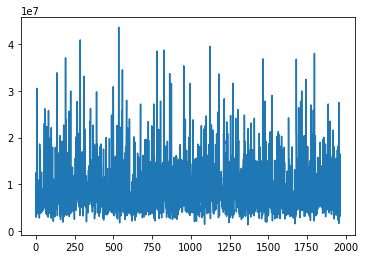

In [65]:
%matplotlib inline
df_realstate["price"].plot()

(array([541., 770., 318., 165.,  98.,  37.,  17.,   9.,   7.,   3.]),
 array([ 1242000.,  5486800.,  9731600., 13976400., 18221200., 22466000.,
        26710800., 30955600., 35200400., 39445200., 43690000.]),
 <a list of 10 Patch objects>)

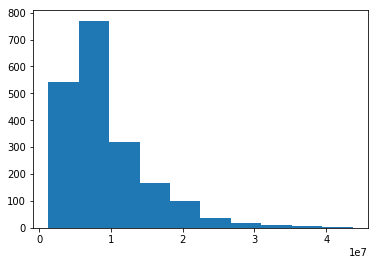

In [66]:
plt.hist(df_realstate.price)

Now, we plot  the standardized data, and observe the range and the centre of the distribution for the standardised features. 

Plotting the data after normalization

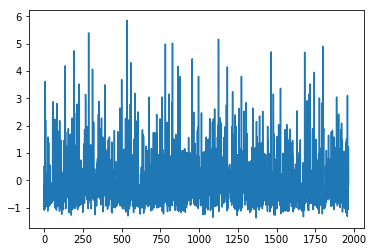

In [67]:
df_realstate["Pscaled"].plot()

(array([541., 770., 318., 165.,  98.,  37.,  17.,   9.,   7.,   3.]),
 array([-1.36828622, -0.64633546,  0.07561529,  0.79756604,  1.51951679,
         2.24146754,  2.96341829,  3.68536904,  4.4073198 ,  5.12927055,
         5.8512213 ]),
 <a list of 10 Patch objects>)

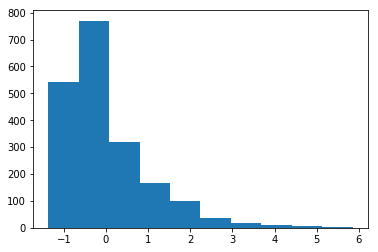

In [68]:
plt.hist(df_realstate.Pscaled)

Plotting the data before and after normalization for better visualisation comparison

(<matplotlib.axes._subplots.AxesSubplot at 0x21ddc48a470>,
 <matplotlib.axes._subplots.AxesSubplot at 0x21ddc48a470>)

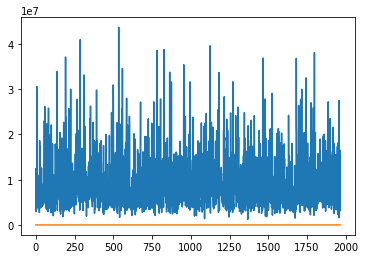

In [69]:
df_realstate["price"].plot(), df_realstate["Pscaled"].plot()

You can see from above graphs that both original and standardized data are in the same shape before after standardarisation.

## Min-Max Normalisation

Min-Max normalisation transform data to a new range of intervals either [0,1] and [-1,1] depending on problem domain. It work well where data relies on distance. This method narrow down the range of data more efficiently leading a very small standard deviations, reducing effect of outliers.

In [70]:
# Reducing down the range between [0,1]

minmax_scale = preprocessing.MinMaxScaler().fit(df_realstate[['price']])
df_realstate_minmax = minmax_scale.transform(df_realstate[['price']]) # an array not a df
df_realstate_minmax[0:5]

array([[0.04103845],
       [0.26404071],
       [0.04141538],
       [0.17315303],
       [0.04871843]])

In [71]:
df_realstate['mmnorm'] = df_realstate_minmax[:,0] # so 'Pscaled' is price scaled
df_realstate.head()

,index,addr_street,bathrooms,bedrooms,lat,lng,parking_space,price,property_id,property_type,...,distance_to_hospital,shopping_center_id,distance_to_sc,train_station_id,distance_to_train_station,suburb,transfer_flag,travel_min_to_CBD,Pscaled,mmnorm
0,0,58 Cuthbert Street,1.0,3.0,-37.684444,144.930405,0.0,2984000.0,19029.0,house,...,3858,SC_072,3819,20030,963,BROADMEADOWS,0,37.0,-1.072009,0.041038
1,1,3 Young Street,2.0,4.0,-37.747993,145.010973,3.0,12450000.0,32557.0,house,...,1683,SC_103,1228,20013,990,PRESTON,0,25.0,0.537958,0.264041
2,2,172 Graham Street,1.0,3.0,-37.690346,144.917394,0.0,3000000.0,18321.0,house,...,4422,SC_059,2867,20031,550,BROADMEADOWS,0,35.0,-1.069288,0.041415
3,3,3 Piper Crescent,2.0,3.0,-37.698704,145.168106,2.0,8592000.0,47010.0,house,...,5528,SC_051,2883,19987,2434,ELTHAM,0,44.0,-0.118207,0.173153
4,4,4 Moore Street,1.0,2.0,-37.825928,145.010773,1.0,3310000.0,53225.0,house,...,910,SC_038,1645,19906,336,RICHMOND,0,13.0,-1.016563,0.048718


(array([541., 770., 318., 165.,  98.,  37.,  17.,   9.,   7.,   3.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

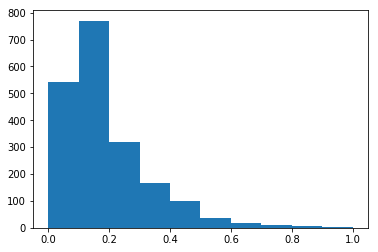

In [72]:
plt.hist(df_realstate.mmnorm)

In [73]:
print("Min-value after min-max scaling",df_realstate_minmax[:,0].min())
print("Max-value after min-max scaling",df_realstate_minmax[:,0].max())

Min-value after min-max scaling 0.0
Max-value after min-max scaling 1.0000000000000002


Although the prices are very high still it can be ranged between a desired range of [0,1]. When comparing original and max-min mormalisation as such there is not much difference in visualisation but still the values are reduced in a smaller range.

## Transformations

Transformations are used to converts data to another form by generating new set
of features to replace the original features.

## Sqrt Transformation

In [74]:
df_realstate.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1965 entries, 0 to 1964
Data columns (total 24 columns):
index                        1965 non-null int64
addr_street                  1965 non-null object
bathrooms                    1965 non-null float64
bedrooms                     1965 non-null float64
lat                          1965 non-null float64
lng                          1965 non-null float64
parking_space                1965 non-null float64
price                        1965 non-null float64
property_id                  1965 non-null float64
property_type                1965 non-null object
year                         1965 non-null float64
supermarket_id               1965 non-null object
distance_to_supermaket       1965 non-null int64
hospital_id                  1965 non-null object
distance_to_hospital         1965 non-null int64
shopping_center_id           1965 non-null object
distance_to_sc               1965 non-null int64
train_station_id             1965 non-n

In [75]:
import math
df_realstate['slmr'] = None
df_realstate['slmr'] = df_realstate.slmr.astype(float)


for index,row in df_realstate.iterrows():
    df_realstate['slmr'][index]  = math.sqrt(row["price"])

df_realstate.head()

C:\Users\NIKITA\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys


,index,addr_street,bathrooms,bedrooms,lat,lng,parking_space,price,property_id,property_type,...,shopping_center_id,distance_to_sc,train_station_id,distance_to_train_station,suburb,transfer_flag,travel_min_to_CBD,Pscaled,mmnorm,slmr
0,0,58 Cuthbert Street,1.0,3.0,-37.684444,144.930405,0.0,2984000.0,19029.0,house,...,SC_072,3819,20030,963,BROADMEADOWS,0,37.0,-1.072009,0.041038,1727.425831
1,1,3 Young Street,2.0,4.0,-37.747993,145.010973,3.0,12450000.0,32557.0,house,...,SC_103,1228,20013,990,PRESTON,0,25.0,0.537958,0.264041,3528.455753
2,2,172 Graham Street,1.0,3.0,-37.690346,144.917394,0.0,3000000.0,18321.0,house,...,SC_059,2867,20031,550,BROADMEADOWS,0,35.0,-1.069288,0.041415,1732.050808
3,3,3 Piper Crescent,2.0,3.0,-37.698704,145.168106,2.0,8592000.0,47010.0,house,...,SC_051,2883,19987,2434,ELTHAM,0,44.0,-0.118207,0.173153,2931.211354
4,4,4 Moore Street,1.0,2.0,-37.825928,145.010773,1.0,3310000.0,53225.0,house,...,SC_038,1645,19906,336,RICHMOND,0,13.0,-1.016563,0.048718,1819.340540


(array([ 52., 363., 558., 466., 232., 159.,  84.,  30.,  12.,   9.]),
 array([1114.45053726, 1663.98959832, 2213.52865938, 2763.06772044,
        3312.6067815 , 3862.14584256, 4411.68490362, 4961.22396468,
        5510.76302574, 6060.3020868 , 6609.84114786]),
 <a list of 10 Patch objects>)

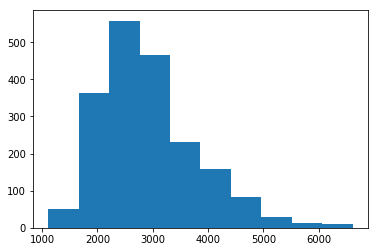

In [76]:
plt.hist(df_realstate.slmr)

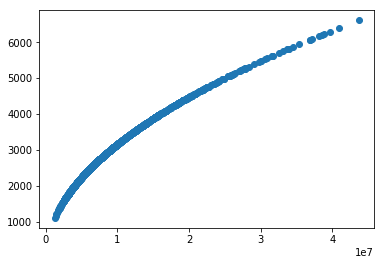

In [77]:
plt.scatter(df_realstate.price, df_realstate.slmr) 

Above graphs shows that in sqrt transformation its positive skewed data.

## Power Transformation

Improves linearity with variables

In [78]:
import math
df_realstate['plmr'] = None
df_realstate['plmr'] = df_realstate.plmr.astype(float)


for index,row in df_realstate.iterrows():
    df_realstate['plmr'][index]  = math.pow(row["price"],2)

df_realstate.head()

C:\Users\NIKITA\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys


,index,addr_street,bathrooms,bedrooms,lat,lng,parking_space,price,property_id,property_type,...,distance_to_sc,train_station_id,distance_to_train_station,suburb,transfer_flag,travel_min_to_CBD,Pscaled,mmnorm,slmr,plmr
0,0,58 Cuthbert Street,1.0,3.0,-37.684444,144.930405,0.0,2984000.0,19029.0,house,...,3819,20030,963,BROADMEADOWS,0,37.0,-1.072009,0.041038,1727.425831,8.904256e+12
1,1,3 Young Street,2.0,4.0,-37.747993,145.010973,3.0,12450000.0,32557.0,house,...,1228,20013,990,PRESTON,0,25.0,0.537958,0.264041,3528.455753,1.550025e+14
2,2,172 Graham Street,1.0,3.0,-37.690346,144.917394,0.0,3000000.0,18321.0,house,...,2867,20031,550,BROADMEADOWS,0,35.0,-1.069288,0.041415,1732.050808,9.000000e+12
3,3,3 Piper Crescent,2.0,3.0,-37.698704,145.168106,2.0,8592000.0,47010.0,house,...,2883,19987,2434,ELTHAM,0,44.0,-0.118207,0.173153,2931.211354,7.382246e+13
4,4,4 Moore Street,1.0,2.0,-37.825928,145.010773,1.0,3310000.0,53225.0,house,...,1645,19906,336,RICHMOND,0,13.0,-1.016563,0.048718,1819.340540,1.095610e+13


(array([1.62e+03, 2.13e+02, 7.70e+01, 2.40e+01, 1.10e+01, 8.00e+00,
        3.00e+00, 6.00e+00, 2.00e+00, 1.00e+00]),
 array([1.54256400e+12, 1.92269918e+14, 3.82997271e+14, 5.73724625e+14,
        7.64451978e+14, 9.55179332e+14, 1.14590669e+15, 1.33663404e+15,
        1.52736139e+15, 1.71808875e+15, 1.90881610e+15]),
 <a list of 10 Patch objects>)

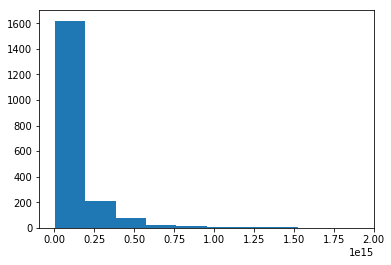

In [79]:
plt.hist(df_realstate.plmr)

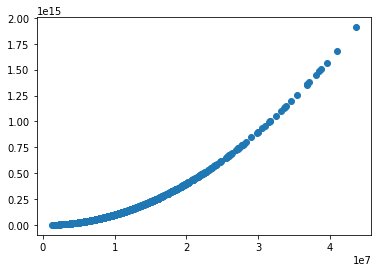

In [80]:
plt.scatter(df_realstate.price, df_realstate.plmr) 

Above graphs shows that in power transformation its also positive skewed data.

## Log Transformation

In [81]:
import math
df_realstate['llmr'] = None
df_realstate['llmr'] = df_realstate.llmr.astype(float)


for index,row in df_realstate.iterrows():
    df_realstate['llmr'][index]  = math.log(row["price"])

df_realstate.head()

C:\Users\NIKITA\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys


,index,addr_street,bathrooms,bedrooms,lat,lng,parking_space,price,property_id,property_type,...,train_station_id,distance_to_train_station,suburb,transfer_flag,travel_min_to_CBD,Pscaled,mmnorm,slmr,plmr,llmr
0,0,58 Cuthbert Street,1.0,3.0,-37.684444,144.930405,0.0,2984000.0,19029.0,house,...,20030,963,BROADMEADOWS,0,37.0,-1.072009,0.041038,1727.425831,8.904256e+12,14.908775
1,1,3 Young Street,2.0,4.0,-37.747993,145.010973,3.0,12450000.0,32557.0,house,...,20013,990,PRESTON,0,25.0,0.537958,0.264041,3528.455753,1.550025e+14,16.337231
2,2,172 Graham Street,1.0,3.0,-37.690346,144.917394,0.0,3000000.0,18321.0,house,...,20031,550,BROADMEADOWS,0,35.0,-1.069288,0.041415,1732.050808,9.000000e+12,14.914123
3,3,3 Piper Crescent,2.0,3.0,-37.698704,145.168106,2.0,8592000.0,47010.0,house,...,19987,2434,ELTHAM,0,44.0,-0.118207,0.173153,2931.211354,7.382246e+13,15.966342
4,4,4 Moore Street,1.0,2.0,-37.825928,145.010773,1.0,3310000.0,53225.0,house,...,19906,336,RICHMOND,0,13.0,-1.016563,0.048718,1819.340540,1.095610e+13,15.012459


(array([  6.,  26., 131., 310., 446., 481., 276., 199.,  70.,  20.]),
 array([14.03223354, 14.38827317, 14.74431279, 15.10035242, 15.45639205,
        15.81243167, 16.1684713 , 16.52451092, 16.88055055, 17.23659017,
        17.5926298 ]),
 <a list of 10 Patch objects>)

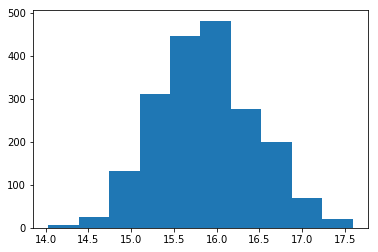

In [82]:
plt.hist(df_realstate.llmr)

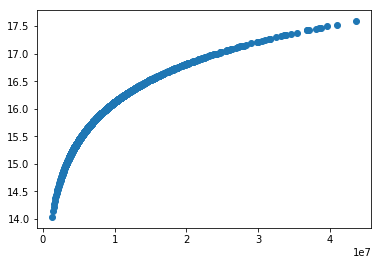

In [83]:
plt.scatter(df_realstate.price, df_realstate.llmr) 

Above graphs shows that in log and sqrt transformation provides symetric distribution data. Our original data of price is right skewed and log and sqrt transformation makes itto symetric. Thus these transformation effects highly to price attribute. The log transformation is only used for positive values and our price data have no zero or negative values. But log transformation works best as its more tending towards normal distribution.

## Linear Regression Model

### Linear model on Original Price

In [84]:
# converting categorical column property type into dummy
df_ptype = pd.get_dummies(df_realstate['property_type'])

In [85]:
df_realstate_new = pd.concat([df_realstate, df_ptype], axis=1)
df_realstate_new

,index,addr_street,bathrooms,bedrooms,lat,lng,parking_space,price,property_id,property_type,...,distance_to_train_station,suburb,transfer_flag,travel_min_to_CBD,Pscaled,mmnorm,slmr,plmr,llmr,house
0,0,58 Cuthbert Street,1.0,3.0,-37.684444,144.930405,0.0,2984000.0,19029.0,house,...,963,BROADMEADOWS,0,37.0,-1.072009,0.041038,1727.425831,8.904256e+12,14.908775,1
1,1,3 Young Street,2.0,4.0,-37.747993,145.010973,3.0,12450000.0,32557.0,house,...,990,PRESTON,0,25.0,0.537958,0.264041,3528.455753,1.550025e+14,16.337231,1
2,2,172 Graham Street,1.0,3.0,-37.690346,144.917394,0.0,3000000.0,18321.0,house,...,550,BROADMEADOWS,0,35.0,-1.069288,0.041415,1732.050808,9.000000e+12,14.914123,1
3,3,3 Piper Crescent,2.0,3.0,-37.698704,145.168106,2.0,8592000.0,47010.0,house,...,2434,ELTHAM,0,44.0,-0.118207,0.173153,2931.211354,7.382246e+13,15.966342,1
4,4,4 Moore Street,1.0,2.0,-37.825928,145.010773,1.0,3310000.0,53225.0,house,...,336,RICHMOND,0,13.0,-1.016563,0.048718,1819.340540,1.095610e+13,15.012459,1
5,5,23 Alden Court,2.0,4.0,-37.972361,145.075766,2.0,11815000.0,90330.0,house,...,1409,CHELTENHAM,0,40.0,0.429958,0.249081,3437.295448,1.395942e+14,16.284880,1
6,7,28 Charles Street,1.0,3.0,-37.772883,144.963995,1.0,10980000.0,20930.0,house,...,520,BRUNSWICK,0,20.0,0.287942,0.229410,3313.608305,1.205604e+14,16.211586,1
7,8,8 Buchanan Street,2.0,3.0,-37.773123,145.038760,2.0,30560000.0,39028.0,house,...,206,IVANHOE,0,21.0,3.618086,0.690680,5528.109984,9.339136e+14,17.235203,1
8,9,138 Hyde Street,1.0,3.0,-37.815086,144.896820,0.0,5220000.0,2825.0,house,...,612,YARRAVILLE,0,15.0,-0.691713,0.093715,2284.731932,2.724840e+13,15.468008,1
9,10,6 Charles Street,2.0,3.0,-37.818967,145.027370,2.0,22240000.0,54636.0,house,...,506,HAWTHORN,0,19.0,2.203030,0.494676,4715.930449,4.946176e+14,16.917403,1


In [86]:
#linear_model Ref-4

x_o = df_realstate_new[['bedrooms','bathrooms','parking_space','house']]  # 4 variables for multiple regression
y_o = df_realstate_new['price']

# with sklearn
regr_o = linear_model.LinearRegression() #creating linear model
regr_o.fit(x_o,y_o) #fitting the model

print('Intercept: \n', regr_o.intercept_) # intercept values
print('Coefficients: \n', regr_o.coef_) # coefficient values of all variables on price variable

m1_o = regr_o.coef_[0] #coefficient for bedrooms #Ref-7
m2_o = regr_o.coef_[1] #coefficient for bathrooms
m3_o = regr_o.coef_[2] #coefficient for parking_space
m4_o = regr_o.coef_[3] #coefficient for house
c_o = regr_o.intercept_ # intercept value

print('R-squared value:', regr_o.score(x_o,y_o)) 

Intercept: 
 3715641.1386899166
Coefficients: 
 [1014576.69114101 1269192.0067865   234837.16796097       0.        ]
R-squared value: 0.05972973975554452


Above result shows that R-squared value is 5% for original price.

### Linear model on sqrt transformation Price

In [87]:
# linear_model

x_s = df_realstate_new[['bedrooms','bathrooms','parking_space','house']]  # 4 variables for multiple regression
y_s = df_realstate_new['slmr']

# with sklearn
regr_s = linear_model.LinearRegression() #creating linear model
regr_s.fit(x_s,y_s) #fitting the model

print('Intercept: \n', regr_s.intercept_) # intercept values
print('Coefficients: \n', regr_s.coef_) # coefficient values of all 4 variables on price variable

m1_s = regr_s.coef_[0] #coefficient for bedrooms #Ref-7
m2_s = regr_s.coef_[1] #coefficient for bathrooms
m3_s = regr_s.coef_[2] #coefficient for parking_space
m4_s = regr_s.coef_[3] #coefficient for house
c_s = regr_s.intercept_ # intercept value

print('R-squared value:', regr_s.score(x_s,y_s)) 

Intercept: 
 2099.2623022815433
Coefficients: 
 [143.38965131 190.82805206  43.86407461   0.        ]
R-squared value: 0.06018591940942742


Above result shows that R-squared value is 6% for sqrt transformation.

### Linear model on power transformation Price

In [88]:
# linear_model

x_p = df_realstate_new[['bedrooms','bathrooms','parking_space','house']]  # 5 variables for multiple regression
y_p = df_realstate_new['plmr']

# with sklearn
regr_p = linear_model.LinearRegression() #creating linear model
regr_p.fit(x_p,y_p) #fitting the model


print('Intercept: \n', regr_p.intercept_) # intercept values
print('Coefficients: \n', regr_p.coef_) # coefficient values of all 4 variables on price

m1_p = regr_p.coef_[0] #coefficient for drone type #Ref-7
m2_p = regr_p.coef_[1] #coefficient for post type
m3_p = regr_p.coef_[2] #coefficient for journey distance
m4_p = regr_p.coef_[3] #coefficient for travel time
c_p = regr_p.intercept_ # intercept value

print('R-squared value:', regr_p.score(x_p,y_p)) 

Intercept: 
 -35249103661670.016
Coefficients: 
 [3.05206705e+13 3.43200855e+13 3.41831461e+12 0.00000000e+00]
R-squared value: 0.04831100923967724


Above result shows that R-squared value is 4.8 % for power transformation.

### Linear model on Log transformation Price

In [89]:
# linear_model

x_l = df_realstate_new[['bedrooms','bathrooms','parking_space','house']]  # 4 variables for multiple regression
y_l = df_realstate_new['llmr']

# with sklearn
regr_l = linear_model.LinearRegression() #creating linear model
regr_l.fit(x_l,y_l) #fitting the model

print('Intercept: \n', regr_l.intercept_) # intercept values
print('Coefficients: \n', regr_l.coef_) # coefficient values of all 4 variables on price variable

m1_l = regr_l.coef_[0] #coefficient for bedrooms #Ref-7
m2_l = regr_l.coef_[1] #coefficient for bathrooms
m3_l = regr_l.coef_[2] #coefficient for parking_space
m4_l = regr_l.coef_[3] #coefficient for house
c_l = regr_l.intercept_ # intercept value

print('R-squared value:', regr_l.score(x_l,y_l)) 

Intercept: 
 15.35392590611596
Coefficients: 
 [0.08693429 0.12308993 0.03457477 0.        ]
R-squared value: 0.056575048659757494


### Linear model on Max-Min normalisation

In [92]:
# linear_model  

x_m = df_realstate_new[['bedrooms','bathrooms','parking_space','house']]  # 4 variables for multiple regression
y_m = df_realstate_new['mmnorm']

# with sklearn
regr_m = linear_model.LinearRegression() #creating linear model
regr_m.fit(x_m,y_m) #fitting the model

print('Intercept: \n', regr_m.intercept_) # intercept values
print('Coefficients: \n', regr_m.coef_) # coefficient values of all 4 variables on price variable

m1_m = regr_m.coef_[0] #coefficient for bedrooms #Ref-7
m2_m = regr_m.coef_[1] #coefficient for bathrooms
m3_m = regr_m.coef_[2] #coefficient for parking_space
m4_m = regr_m.coef_[3] #coefficient for house
c_m = regr_m.intercept_ # intercept value

print('R-squared value:', regr_m.score(x_m,y_m)) 

Intercept: 
 0.05827462162386726
Coefficients: 
 [0.02390164 0.02989992 0.00553235 0.        ]
R-squared value: 0.05972973975554451


### Linear model on Standardarisation 

In [91]:
# linear_model

x_ps = df_realstate_new[['bedrooms','bathrooms','parking_space','house']]  # 4 variables for multiple regression
y_ps = df_realstate_new['Pscaled']

# with sklearn
regr_ps = linear_model.LinearRegression() #creating linear model
regr_ps.fit(x_ps,y_ps) #fitting the model

print('Intercept: \n', regr_ps.intercept_) # intercept values
print('Coefficients: \n', regr_ps.coef_) # coefficient values of all 4 variables on price variable

m1_ps = regr_ps.coef_[0] #coefficient for bedrooms #Ref-7
m2_ps = regr_ps.coef_[1] #coefficient for bathrooms
m3_ps = regr_ps.coef_[2] #coefficient for parking_space
m4_ps = regr_ps.coef_[3] #coefficient for house
c_ps = regr_ps.intercept_ # intercept value

print('R-squared value:', regr_ps.score(x_ps,y_ps)) 

Intercept: 
 -0.9475721466635069
Coefficients: 
 [0.17255805 0.21586273 0.03994084 0.        ]
R-squared value: 0.05972973975554419


We can infer from above models that sqrt transformation works best in case of our data as its R squared value is the highest of 6% and but our original price data is right skewed which can be normalised or transformed using sqrt or log. As log and sqrt both provides normal distribution for price attribute. 

Our predictors are bathrooms, bedrooms, parking space and property type they have values like 1,2,3 and so on which means there is huge difference between price values and other variables attributes. Thus in order to find a best model we should consider other predictors like nearest supermarket, nearest station, nearest shopping center and other features. These predictors will be more important in predicting property price. As in above calculated models we are getting very less R-squared values that means these predictors are not much significant for calculating price attribute. There should be consideration of other more significant attributes to creating a best model.

Thus, log transformation will be the best transformation for price attribute.

## References

* Reference 1 - https://www.analyticsvidhya.com/blog/2015/10/beginner-guide-web-scraping-beautiful-soup-python/
* Reference 2 - https://www.ritchieng.com/pandas-changing-datatype/
* Reference 3 - https://gis.stackexchange.com/questions/250172/finding-out-if-coordinate-is-within-shapefile-shp-using-pyshp
* Reference 4 - https://datatofish.com/multiple-linear-regression-python/

## Summary

This assessment covers data integration and reshapping of property data using different transformation and normalisation methods.

The main outcome of this assessment is

* Understanding data extraction from different format file like xml, csv, xlxs, json etc.
* Understanding integration of different format into one.
* Understanding Dataframe manipulation for reformating data.
* Understanding different types of transformations and normalisations on a variable.
* Understanding linear models concepts.
* Learning shapefiles and its different features.
